In [1]:
import nltk

from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [2]:
file = open('1.txt','r')

In [3]:
file.read()

"A Game of Thrones is set in the Seven Kingdoms of Westeros, a land reminiscent of medieval Europe. In Westeros the seasons last for years, sometimes decades, at a time.\n\nFifteen years prior to the novel, the Seven Kingdoms were torn apart by a civil war, known alternately as 'Robert's Rebellion' and the 'War of the Usurper'. Prince Rhaegar Targaryen kidnapped Lyanna Stark, arousing the ire of her family and of her betrothed, Lord Robert Baratheon. The Mad King, Aerys II Targaryen, had Lyanna's father and eldest brother executed when they demanded her safe return. Her second brother, Eddard, joined his boyhood friend Robert Baratheon and Jon Arryn, with whom they had been fostered as children, in declaring war against the Targaryens, securing the allegiances of House Tully and House Arryn through a network of dynastic marriages (Lord Eddard to Catelyn Tully and Lord Jon Arryn to Lysa Tully). The powerful House Tyrell continued to support the King, but House Lannister and House Martel

In [4]:
data = []
for x in range(1,11):
    f = str(x)+'.txt'
    file = open(f,'r')
    data.append(file.read())

In [5]:
global stopw
def token_stop(text):
    words = word_tokenize(text)
    stopw = list(stopwords.words('english'))
    punct = string.punctuation
    punct = word_tokenize(punct)
    punct += ['.','``','...','\'s','--','-','n\'t']
    stopw += punct
    filtered = [w for w in words if not w in stopw]
    return filtered

def stemm(text):
    ps = PorterStemmer()
    stem = []
    for w in text:
        stem.append(ps.stem(w))
    return stem    
    
    

In [6]:
textall = []
tokens = {}
for x in range(0,10):
    filtered = token_stop(data[x])
    stemmed = stemm(filtered)
    textall.append(stemmed)
    tokens[x] = stemmed

In [7]:
wordcounts = []
for x in range(0,10):
    wordcounts.append(len(tokens[x]))

Text(0.5,1,'WordCounts')

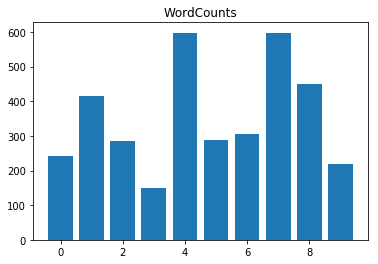

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.bar(list(range(10)),wordcounts)
plt.title('WordCounts')

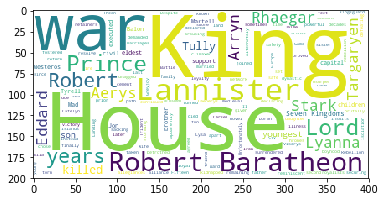

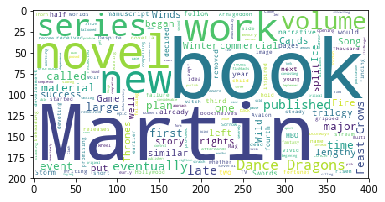

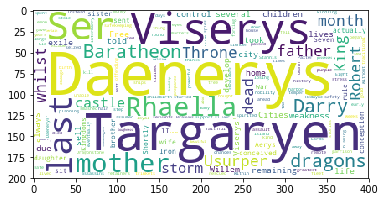

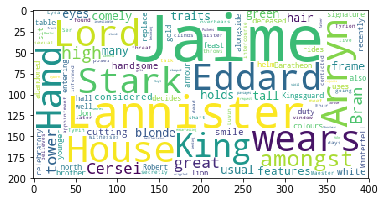

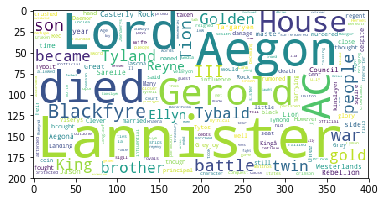

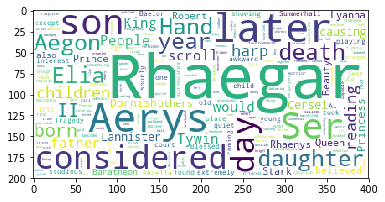

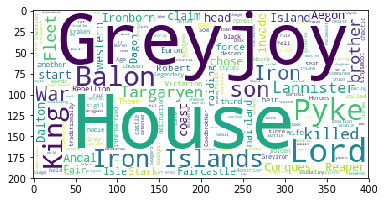

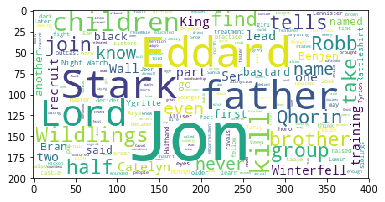

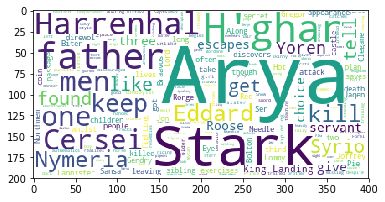

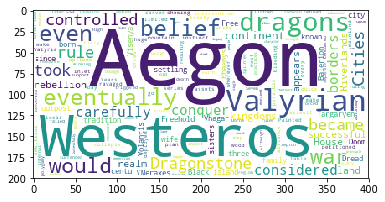

In [9]:
from wordcloud import WordCloud

for x in range(0,10):
    wordcloud = WordCloud(stopwords=stopwords.words('english'),background_color='white').generate(data[x])
    plt.imshow(wordcloud)
    plt.show()

# Posting List

In [10]:
s = set( val for dic in tokens for val in tokens[dic])

In [11]:
arr =[[]]
for x in s:
    temp = []
    for i in range(0,10):
        if x in tokens[i]:
            temp.append(i)
    arr.append(temp)
del arr[0]

In [12]:
arr = dict(zip(s,arr))

In [13]:
arr

{"'d": [5],
 'mind': [1, 5],
 'childbirth': [2],
 'major': [1],
 'purpl': [2],
 'sell': [2],
 'north': [3, 7],
 'life': [2, 7, 8],
 'rhaena': [4],
 'place': [5, 7, 8, 9],
 'unabl': [2, 6],
 'sorrow': [1],
 'hall': [3],
 'six': [0, 9],
 'charg': [8],
 'drink': [7],
 'concept': [2],
 'richest': [4],
 'mother': [2, 7],
 'tatter': [4],
 'compris': [4],
 'blood': [5],
 'embarrassingli': [7],
 'back': [1, 7],
 'lament': [3],
 'sit': [2, 3],
 'half-broth': [8],
 'given': [0, 8],
 'manag': [5, 8],
 'remov': [1],
 'isol': [0],
 'distinguish': [5],
 'sleep': [6],
 'care': [0, 9],
 'stand': [3, 8],
 'shout': [7],
 'tyland': [4, 6],
 'tourney': [5],
 'tourni': [5],
 'right': [1, 4],
 'year': [0, 1, 2, 4, 5, 6, 7, 9],
 'asha': [6],
 'seven': [0, 2, 4, 9],
 'show': [5, 9],
 'syrio': [8],
 'consid': [2, 3, 5, 9],
 'enorm': [1, 5],
 'aemon': [4],
 'made': [1, 4, 8],
 'superior': [7],
 'sam': [7],
 'goe': [7],
 'europ': [0],
 'five': [1],
 'save': [7, 8],
 'closer': [4],
 'across': [0, 4],
 'viseri': [

# Query

In [14]:
query = input('Enter query:')
query = token_stop(query)
query = stemm(query)
query

Enter query:Lord Tymond Lannister attended the Great Council that named Viserys I king


['lord',
 'tymond',
 'lannist',
 'attend',
 'great',
 'council',
 'name',
 'viseri',
 'I',
 'king']

In [15]:
def intersection(lists):
    return list(set.intersection(*map(set,lists)))
def union(lists):
    return list(set.union(*map(set,lists)))

In [16]:
quer = []
for x in query:
    if x in arr:
        quer.append(arr[x])

In [17]:
print(intersection(quer))
print(union(quer))

[4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Boolean

In [21]:
boolean = {}
for k,v in sorted(arr.items()):
    boolean[k] = []
    for i in range(0,10):
        if i in v:
            boolean[k].append(1)
        else:
            boolean[k].append(0)

In [22]:
boolean

{"'d": [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 "'robert": [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 "'war": [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 "'weasel": [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 '1,000': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '101': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '133': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '14': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 '1990': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '1991': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '1996': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '1998': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '200': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '2000': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '2001': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '2005': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '2007': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '2009': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '2011': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '212': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '230': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '232': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '235': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '236': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '243': [0, 0, 0, 0, 

# TFIDF

In [23]:
for x in boolean:
    counter = 0
    temp = boolean[x]
    for i in range(10):
        if(temp[i]>0):
            counter = counter + 1
    boolean[x].append(counter)

In [26]:
import math
for x in boolean:
    temp = boolean[x]
    idf = math.log((10/temp[10]),10)
    boolean[x].append(idf)

In [28]:
for x in boolean:
    temp = boolean[x]
    for i in range(10):
        if(temp[i]!=0):
            norm = (1+math.log(temp[i],10))*temp[11]
        else:
            norm=0
        boolean[x].append(norm)

In [30]:
dictlist = []
keys = []
for k,v in boolean.items():
    dictlist.append(v)
    keys.append(k)

In [35]:
import pandas as pd
names = ['tf1','tf2','tf3','tf4','tf5','tf6','tf7','tf8','tf9','tf10','df','idf','ntf1','ntf2','ntf3','ntf4','ntf5','ntf6','ntf7','ntf8','ntf9','ntf10']
df = pd.DataFrame(dictlist,index=keys,columns=names)

In [36]:
df

,tf1,tf2,tf3,tf4,tf5,tf6,tf7,tf8,tf9,tf10,...,ntf1,ntf2,ntf3,ntf4,ntf5,ntf6,ntf7,ntf8,ntf9,ntf10
'd,0,0,0,0,0,1,0,0,0,0,...,0.00000,0.000000,0.000000,0.00000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000
'robert,1,0,0,0,0,0,0,0,0,0,...,1.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
'war,1,0,0,0,0,0,0,0,0,0,...,1.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
'weasel,0,0,0,0,0,0,0,0,1,0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000
"1,000",0,1,0,0,0,0,0,0,0,0,...,0.00000,1.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
101,0,0,0,0,1,0,0,0,0,0,...,0.00000,0.000000,0.000000,0.00000,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000
133,0,0,0,0,1,0,0,0,0,0,...,0.00000,0.000000,0.000000,0.00000,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000
14,0,0,0,0,0,0,0,1,0,0,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000
1990,0,1,0,0,0,0,0,0,0,0,...,0.00000,1.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
1991,0,1,0,0,0,0,0,0,0,0,...,0.00000,1.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000


# Query

In [46]:
query = input("Enter query:")
filtered = token_stop(query)
stemmed = stemm(filtered)

print(stemmed)
import collections
qterm = []
counter = collections.Counter(stemmed)
for x in keys:
    if x in counter:
        idf = df['idf'][x]
        y = counter[x]
        y = (1 + math.log(y,10))*idf
        qterm.append(y)
    else:
        qterm.append(0)

Enter query:Lord Tymond Lannister attended the Great Council that named Viserys I king
['lord', 'tymond', 'lannist', 'attend', 'great', 'council', 'name', 'viseri', 'I', 'king']


In [51]:
import numpy as np
def cosine(x,y):
    sumx=0
    sumy=0
    summ=0
    for i in range(len(keys)):
        summ = summ + (x[i]*y[i])
        sumx = sumx + (x[i]*x[i])
        sumy = sumy + (y[i]*y[i])
    ans = summ/(np.sqrt(sumx)*np.sqrt(sumy))
    return ans

In [53]:
answer = {}
for x in range(10):
    str1 = 'ntf'+ str(x+1)
    answer[x] = cosine(qterm,df[str1])

In [60]:
answer
import operator
sorted_d = sorted(answer.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d)

[(4, 0.11985633772926439), (6, 0.035696029064375363), (7, 0.022669989730319993), (3, 0.021408062783006238), (0, 0.021299935742251922), (2, 0.015539651793003447), (8, 0.008709447729504995), (1, 0.0065678526759329649), (5, 0.0062405571183315094), (9, 0.0051644985112652576)]


In [61]:
relevant = []
n = input("Enter no. of relevant docs:")
for x in range(int(n)):
    relevant.append(int(input("Enter next relevant doc")))

retrieved = []
for key,value in sorted_d:
    if(value!=0):
        retrieved.append(key)

Enter no. of relevant docs:5
Enter next relevant doc0
Enter next relevant doc1
Enter next relevant doc5
Enter next relevant doc4
Enter next relevant doc10


In [62]:
list.sort(retrieved)
print(retrieved)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [64]:
ans=[[]]
ans.append(relevant)
ans.append(retrieved)
del ans[0]
ans = intersection(ans)
print(ans)

[0, 1, 4, 5]


In [65]:
print("Precision = ", (len(ans)/len(retrieved))*100, "%")
print("Recall = ", (len(ans)/len(relevant))*100, "%")

Precision =  40.0 %
Recall =  80.0 %


In [71]:
data = df.as_matrix()

In [72]:
print(data)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 1.          0.          0.         ...,  0.          0.          0.        ]
 [ 1.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.39794001  0.          0.        ]
 [ 1.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


#  SVD

In [73]:
from numpy import linalg as la

In [74]:
u,s,v = la.svd(data)

In [78]:
k=5

In [87]:
recons = np.matrix(u[:,:k])*np.diag(s[:k])*np.matrix(v[:k,:])

In [85]:
print(u[:,:k].shape)
print(np.diag(s[:k]).shape)
print(np.matrix(v[:k,:]).shape)

(1398, 5)
(5, 5)
(5, 22)


In [89]:
print(data.shape)
print(recons.shape)

(1398, 22)
(1398, 22)
